In [2]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import AlignIO
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Working with the alignment file

The alignment file can be downloaded from the [eggNOG database](http://eggnog45.embl.de/#/app/results?seqid=O15393&target_nogs=KOG3627#KOG3627_datamenu). The database indicates that, as of June 30, 2020, there are 9,757 sequences in the alignment for tmprss2.

The file is in `fasta` format. Each record has two lines:

    >fasta_header
    SEQUENCE

## Read the alignment file

We read this file using the [biopython](https://biopython.org/) `AlignIO.read()` method, which will parse the lines to extract header and sequence pairs into an iterable object (like a list).

By wrapping the call to `AlignI0.read()` in a [list comprehension](https://medium.com/better-programming/list-comprehension-in-python-8895a785550b), which will make it easier for us to access different entries in the alignment.

In [3]:
tmprss2_aln = [i for i in AlignIO.read(open('trimmed_alg.txt'), format='fasta')]

## Explore the alignment file

We can check the length of the `tmprss2_aln` list, and make sure it matches our expected number of sequences, 9,757.

In [4]:
len(tmprss2_aln)

9757

We can also access elements of the `tmprss2_aln` list by their index. Python indexing starts at `0`: the first element in a list is always index 0.

Each element in the `tmprss2_aln` list is a `SeqRecord` object. That means it has attributes and methods that will work specifically on `SeqRecord` objects only. We can inspect a few of those attributes.

In [6]:
tmprss2_aln[0]

SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='7260.FBpp0240705', name='7260.FBpp0240705', description='7260.FBpp0240705', dbxrefs=[])

In [7]:
tmprss2_aln[0].description

'7260.FBpp0240705'

In [8]:
tmprss2_aln[0].id

'7260.FBpp0240705'

In [9]:
tmprss2_aln[0].name

'7260.FBpp0240705'

Note that the `description`, `name`, and `id` attributes contain the same information.

We see that the `SeqRecord` objects in the `tmprss2_aln` list do not have any species information. The species information for each identifier is found in the metadata.

# Working with the metadata file

The metadata file can also be downloaded from the [eggNOG database](http://eggnog45.embl.de/#/app/results?seqid=O15393&target_nogs=KOG3627#KOG3627_datamenu).

## Read the metadata file

This file is plain text, and -- unlike the `fasta` file for the alignment -- each row representents a single entry. We can read in this file using the `read_table()` method in the `pandas` library.

In [10]:
tmprss2_ext = pd.read_table('extended_members.txt', header=None)

The metadata file does not contain column names ("headers"), so we will manually add our own.

In [11]:
tmprss2_ext.columns = ['id_1', 'id_2', 'species', '', '']
tmprss2_ext.head()

,id_1,id_2,species,,
0,CRE24749,CRE24749,Caenorhabditis remanei,31234,"aliases:DS268562,E3N945_CAERE,E3N945,CRE_24749..."
1,CRE21132,CRE-TRY-4,Caenorhabditis remanei,31234,"aliases:E3MEX0,DS268440,E3MEX0_CAERE,CRE21132,..."
2,CRE24758,CRE-TRY-6,Caenorhabditis remanei,31234,"aliases:E3N963,DS268562,E3N963_CAERE,CRE24758,..."
3,CRE18672,CRE18672,Caenorhabditis remanei,31234,"aliases:DS268410,E3LKX4_CAERE,E3LKX4,CRE_18672..."
4,CRE24729,CRE-TRY-3,Caenorhabditis remanei,31234,"aliases:E3N418,DS268522,E3N418_CAERE,CRE24729,..."


## Explore the metadata file

As we did with the alignment file, we want to check that the metadata file contains the number of records we expect. That number is 9,757.

In [12]:
tmprss2_ext.shape

(9757, 5)

The `pandas` library has a number of very useful methods for working with data. We'll explore one specific type of data aggregation: counting entries by category using the `groupby()` method.

**Question: How many sequences are there from each species?**

We can answer this question by grouping all rows by the `species` column and taking the `count()` of the records in each grouping. We will specifically look at the number of `id_1` values associated with each unique species name.

In [13]:
n_species = pd.DataFrame(tmprss2_ext.groupby('species')['id_1'].count())

In [14]:
n_species

,id_1
species,
6085,32
9478,58
Acyrthosiphon pisum,87
Aedes aegypti,354
Ailuropoda melanoleuca,92
...,...
Tupaia belangeri,69
Tursiops truncatus,88
Verticillium albo atrum VaMs.102,1


This frequency table can be used to make a bar graph showing the counts for each species. We are going to use the library `matplotlib` to set up a plotting area, and then we will use the `pandas` `plot()` method for dataframes to generate the graph.

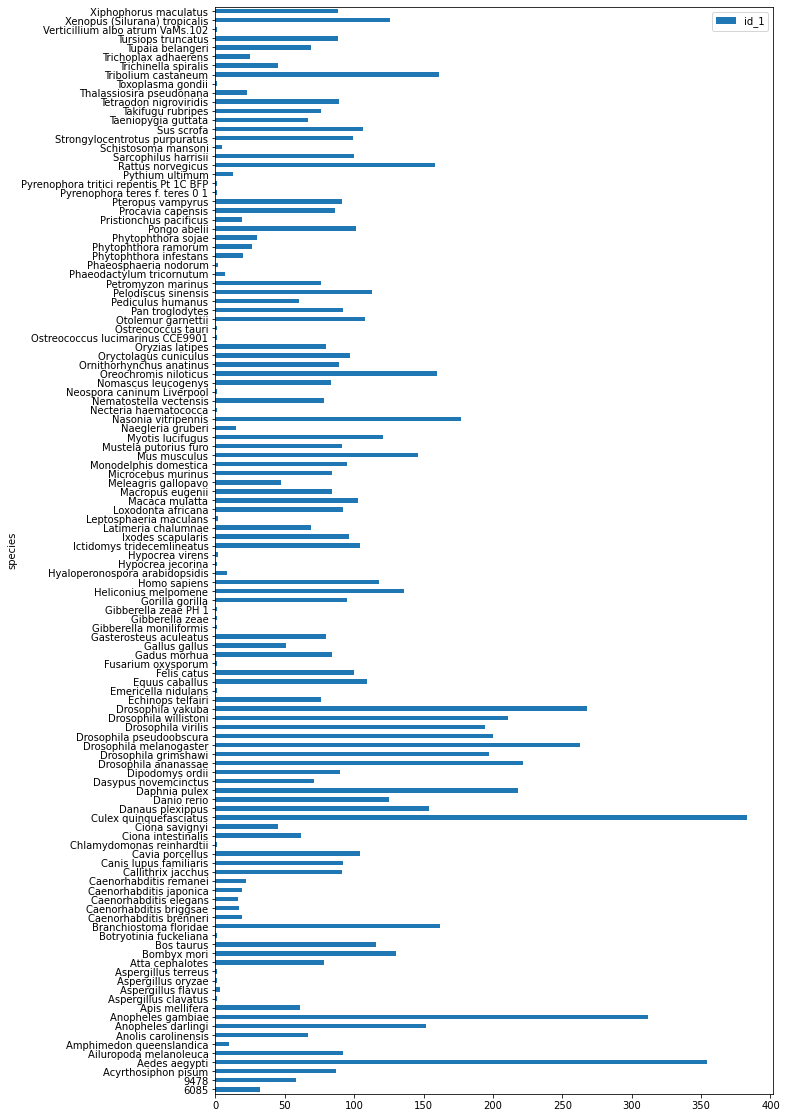

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,20))
n_species.plot(kind="barh", ax=ax)

We can also focus in on only some of the species represented in the dataset. We need a couple of things to do this subsetting:
- a list of the species of interest, exactly as they are named in the data frame
- the column that contains the species

First we'll make the list of species. You can add or remove names from this list as you like.

In [16]:
domestic_sp_names = ['Homo sapiens', 'Mus musculus', 'Canis lupus familiaris', 'Felis catus', 'Bos taurus', 'Equus caballus', 'Gallus gallus']

Next we'll take a subset of the data in the `n_species` data frame. The species names are in a column named `species`, but because we generated the `n_species` data frame with a `groupby()` operation on the species column, that column is now the [index](https://towardsdatascience.com/pandas-index-explained-b131beaf6f7b#).

In [17]:
domestics = n_species[n_species.index.isin(domestic_sp_names)]

In [18]:
domestics

,id_1
species,
Bos taurus,116
Canis lupus familiaris,92
Equus caballus,109
Felis catus,100
Gallus gallus,51
Homo sapiens,118
Mus musculus,146


Now we can make a second barplot, this time using the data in the `domestics` data frame.

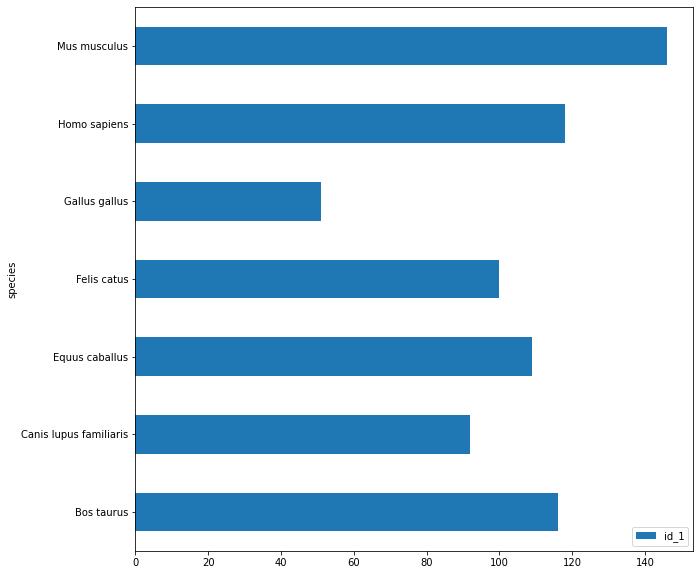

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
domestics.plot(kind="barh", ax=ax)

# Combine the alignment and metadata

The final thing we will do in this tutorial is to add the species names to the `description` attribute of the `SeqRecord` objects in the list `tmprss2_aln`.

We will approach this task using a "for-loop". We will iterate over all the `SeqRecord` elements in the alignment and do the following steps:
- get the identifier in the `id` field
- extract the part of the identifier that will match the `id_1` column of the metadata data frame
- look up the species name in the metadata data frame based on the identifier in the alignment record
- add the species name to the `description` field in the alignment record

In [20]:
for record in tmprss2_aln:
    
    # from visual inspection we know the name format is XXXX.unique_id, so we split on "." and take the last element of the list
    id_code = record.id.split('.')[-1]
    
    # reference the metadata to get the species name
    sp_name = tmprss2_ext[tmprss2_ext['id_1'] == id_code]['species'].values
    try:
        sp_name = sp_name.item()
    except ValueError:
        sp_name = None
    
    # assign the species name to the species attribute
    record.description = sp_name

In [21]:
tmprss2_aln[0].description

'Drosophila willistoni'

In [22]:
tmprss2_aln[0].id

'7260.FBpp0240705'

In [23]:
tmprss2_aln[0].name

'7260.FBpp0240705'

In [24]:
tmprss2_ext[]

SyntaxError: invalid syntax (<ipython-input-24-652bdb0cc411>, line 1)